# Description

This dataset from Kaggle contains 79 feature columns and 1,460 observations. The purpose of this exploratory data analysis (EDA) is to understand how each feature interacts with the target variable, SalePrice. This involves examining the statistical properties of the data, identifying missing values, analyzing the distribution of the target variable to detect potential outliers, and investigating correlations between each feature and the target. These steps are crucial for gaining a deeper understanding of the dataset.

By conducting this EDA, we can make informed decisions about which columns to drop—such as features with weak or no correlation to the target variable or those with excessive missing values that could hinder model performance. We can also identify opportunities for feature engineering by discovering interactions or patterns between features that may improve model predictions. For example, features with a nonlinear relationship to SalePrice or containing redundant information can be transformed or combined to enhance model accuracy.

In [1]:
import pandas as pd

In [2]:
training = pd.read_csv('Data/train.csv')
pd.set_option('display.max_columns', None)
training

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [3]:
df = training.copy()

In [4]:
from IPython.display import Markdown
df_head = df.head()
# Displaying a table in Markdown format to put in .md file
df_head_md = df_head.to_markdown(index=False)
Markdown(df_head_md)

|   Id |   MSSubClass | MSZoning   |   LotFrontage |   LotArea | Street   |   Alley | LotShape   | LandContour   | Utilities   | LotConfig   | LandSlope   | Neighborhood   | Condition1   | Condition2   | BldgType   | HouseStyle   |   OverallQual |   OverallCond |   YearBuilt |   YearRemodAdd | RoofStyle   | RoofMatl   | Exterior1st   | Exterior2nd   | MasVnrType   |   MasVnrArea | ExterQual   | ExterCond   | Foundation   | BsmtQual   | BsmtCond   | BsmtExposure   | BsmtFinType1   |   BsmtFinSF1 | BsmtFinType2   |   BsmtFinSF2 |   BsmtUnfSF |   TotalBsmtSF | Heating   | HeatingQC   | CentralAir   | Electrical   |   1stFlrSF |   2ndFlrSF |   LowQualFinSF |   GrLivArea |   BsmtFullBath |   BsmtHalfBath |   FullBath |   HalfBath |   BedroomAbvGr |   KitchenAbvGr | KitchenQual   |   TotRmsAbvGrd | Functional   |   Fireplaces | FireplaceQu   | GarageType   |   GarageYrBlt | GarageFinish   |   GarageCars |   GarageArea | GarageQual   | GarageCond   | PavedDrive   |   WoodDeckSF |   OpenPorchSF |   EnclosedPorch |   3SsnPorch |   ScreenPorch |   PoolArea |   PoolQC |   Fence |   MiscFeature |   MiscVal |   MoSold |   YrSold | SaleType   | SaleCondition   |   SalePrice |
|-----:|-------------:|:-----------|--------------:|----------:|:---------|--------:|:-----------|:--------------|:------------|:------------|:------------|:---------------|:-------------|:-------------|:-----------|:-------------|--------------:|--------------:|------------:|---------------:|:------------|:-----------|:--------------|:--------------|:-------------|-------------:|:------------|:------------|:-------------|:-----------|:-----------|:---------------|:---------------|-------------:|:---------------|-------------:|------------:|--------------:|:----------|:------------|:-------------|:-------------|-----------:|-----------:|---------------:|------------:|---------------:|---------------:|-----------:|-----------:|---------------:|---------------:|:--------------|---------------:|:-------------|-------------:|:--------------|:-------------|--------------:|:---------------|-------------:|-------------:|:-------------|:-------------|:-------------|-------------:|--------------:|----------------:|------------:|--------------:|-----------:|---------:|--------:|--------------:|----------:|---------:|---------:|:-----------|:----------------|------------:|
|    1 |           60 | RL         |            65 |      8450 | Pave     |     nan | Reg        | Lvl           | AllPub      | Inside      | Gtl         | CollgCr        | Norm         | Norm         | 1Fam       | 2Story       |             7 |             5 |        2003 |           2003 | Gable       | CompShg    | VinylSd       | VinylSd       | BrkFace      |          196 | Gd          | TA          | PConc        | Gd         | TA         | No             | GLQ            |          706 | Unf            |            0 |         150 |           856 | GasA      | Ex          | Y            | SBrkr        |        856 |        854 |              0 |        1710 |              1 |              0 |          2 |          1 |              3 |              1 | Gd            |              8 | Typ          |            0 | nan           | Attchd       |          2003 | RFn            |            2 |          548 | TA           | TA           | Y            |            0 |            61 |               0 |           0 |             0 |          0 |      nan |     nan |           nan |         0 |        2 |     2008 | WD         | Normal          |      208500 |
|    2 |           20 | RL         |            80 |      9600 | Pave     |     nan | Reg        | Lvl           | AllPub      | FR2         | Gtl         | Veenker        | Feedr        | Norm         | 1Fam       | 1Story       |             6 |             8 |        1976 |           1976 | Gable       | CompShg    | MetalSd       | MetalSd       | None         |            0 | TA          | TA          | CBlock       | Gd         | TA         | Gd             | ALQ            |          978 | Unf            |            0 |         284 |          1262 | GasA      | Ex          | Y            | SBrkr        |       1262 |          0 |              0 |        1262 |              0 |              1 |          2 |          0 |              3 |              1 | TA            |              6 | Typ          |            1 | TA            | Attchd       |          1976 | RFn            |            2 |          460 | TA           | TA           | Y            |          298 |             0 |               0 |           0 |             0 |          0 |      nan |     nan |           nan |         0 |        5 |     2007 | WD         | Normal          |      181500 |
|    3 |           60 | RL         |            68 |     11250 | Pave     |     nan | IR1        | Lvl           | AllPub      | Inside      | Gtl         | CollgCr        | Norm         | Norm         | 1Fam       | 2Story       |             7 |             5 |        2001 |           2002 | Gable       | CompShg    | VinylSd       | VinylSd       | BrkFace      |          162 | Gd          | TA          | PConc        | Gd         | TA         | Mn             | GLQ            |          486 | Unf            |            0 |         434 |           920 | GasA      | Ex          | Y            | SBrkr        |        920 |        866 |              0 |        1786 |              1 |              0 |          2 |          1 |              3 |              1 | Gd            |              6 | Typ          |            1 | TA            | Attchd       |          2001 | RFn            |            2 |          608 | TA           | TA           | Y            |            0 |            42 |               0 |           0 |             0 |          0 |      nan |     nan |           nan |         0 |        9 |     2008 | WD         | Normal          |      223500 |
|    4 |           70 | RL         |            60 |      9550 | Pave     |     nan | IR1        | Lvl           | AllPub      | Corner      | Gtl         | Crawfor        | Norm         | Norm         | 1Fam       | 2Story       |             7 |             5 |        1915 |           1970 | Gable       | CompShg    | Wd Sdng       | Wd Shng       | None         |            0 | TA          | TA          | BrkTil       | TA         | Gd         | No             | ALQ            |          216 | Unf            |            0 |         540 |           756 | GasA      | Gd          | Y            | SBrkr        |        961 |        756 |              0 |        1717 |              1 |              0 |          1 |          0 |              3 |              1 | Gd            |              7 | Typ          |            1 | Gd            | Detchd       |          1998 | Unf            |            3 |          642 | TA           | TA           | Y            |            0 |            35 |             272 |           0 |             0 |          0 |      nan |     nan |           nan |         0 |        2 |     2006 | WD         | Abnorml         |      140000 |
|    5 |           60 | RL         |            84 |     14260 | Pave     |     nan | IR1        | Lvl           | AllPub      | FR2         | Gtl         | NoRidge        | Norm         | Norm         | 1Fam       | 2Story       |             8 |             5 |        2000 |           2000 | Gable       | CompShg    | VinylSd       | VinylSd       | BrkFace      |          350 | Gd          | TA          | PConc        | Gd         | TA         | Av             | GLQ            |          655 | Unf            |            0 |         490 |          1145 | GasA      | Ex          | Y            | SBrkr        |       1145 |       1053 |              0 |        2198 |              1 |              0 |          2 |          1 |              4 |              1 | Gd            |              9 | Typ          |            1 | TA            | Attchd       |          2000 | RFn            |            3 |          836 | TA           | TA           | Y            |          192 |            84 |               0 |           0 |             0 |          0 |      nan |     nan |           nan |         0 |       12 |     2008 | WD         | Normal          |      250000 |

# Data Overview

In [5]:
from IPython.display import Markdown

In [6]:
# showing the info and the statistics at the same time:
display(Markdown("### INFO"))
display(df.info())
display(Markdown("### Description"))
display(df.describe())

### INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

### Description

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
from IPython.display import Markdown
stats = df.describe()
# Displaying a table in Markdown format to put in .md file
stats_md = stats.to_markdown(index=False)
Markdown(stats_md)


|      Id |   MSSubClass |   LotFrontage |   LotArea |   OverallQual |   OverallCond |   YearBuilt |   YearRemodAdd |   MasVnrArea |   BsmtFinSF1 |   BsmtFinSF2 |   BsmtUnfSF |   TotalBsmtSF |   1stFlrSF |   2ndFlrSF |   LowQualFinSF |   GrLivArea |   BsmtFullBath |   BsmtHalfBath |    FullBath |    HalfBath |   BedroomAbvGr |   KitchenAbvGr |   TotRmsAbvGrd |   Fireplaces |   GarageYrBlt |   GarageCars |   GarageArea |   WoodDeckSF |   OpenPorchSF |   EnclosedPorch |   3SsnPorch |   ScreenPorch |   PoolArea |   MiscVal |     MoSold |    YrSold |   SalePrice |
|--------:|-------------:|--------------:|----------:|--------------:|--------------:|------------:|---------------:|-------------:|-------------:|-------------:|------------:|--------------:|-----------:|-----------:|---------------:|------------:|---------------:|---------------:|------------:|------------:|---------------:|---------------:|---------------:|-------------:|--------------:|-------------:|-------------:|-------------:|--------------:|----------------:|------------:|--------------:|-----------:|----------:|-----------:|----------:|------------:|
| 1460    |    1460      |     1201      |   1460    |    1460       |    1460       |   1460      |      1460      |     1452     |     1460     |    1460      |    1460     |      1460     |   1460     |   1460     |     1460       |     1460    |    1460        |   1460         | 1460        | 1460        |    1460        |    1460        |     1460       |  1460        |     1379      |  1460        |     1460     |    1460      |     1460      |       1460      |  1460       |     1460      |  1460      |  1460     | 1460       | 1460      |      1460   |
|  730.5  |      56.8973 |       70.05   |  10516.8  |       6.09932 |       5.57534 |   1971.27   |      1984.87   |      103.685 |      443.64  |      46.5493 |     567.24  |      1057.43  |   1162.63  |    346.992 |        5.84452 |     1515.46 |       0.425342 |      0.0575342 |    1.56507  |    0.382877 |       2.86644  |       1.04658  |        6.51781 |     0.613014 |     1978.51   |     1.76712  |      472.98  |      94.2445 |       46.6603 |         21.9541 |     3.40959 |       15.061  |     2.7589 |    43.489 |    6.32192 | 2007.82   |    180921   |
|  421.61 |      42.3006 |       24.2848 |   9981.26 |       1.383   |       1.1128  |     30.2029 |        20.6454 |      181.066 |      456.098 |     161.319  |     441.867 |       438.705 |    386.588 |    436.528 |       48.6231  |      525.48 |       0.518911 |      0.238753  |    0.550916 |    0.502885 |       0.815778 |       0.220338 |        1.62539 |     0.644666 |       24.6897 |     0.747315 |      213.805 |     125.339  |       66.256  |         61.1191 |    29.3173  |       55.7574 |    40.1773 |   496.123 |    2.70363 |    1.3281 |     79442.5 |
|    1    |      20      |       21      |   1300    |       1       |       1       |   1872      |      1950      |        0     |        0     |       0      |       0     |         0     |    334     |      0     |        0       |      334    |       0        |      0         |    0        |    0        |       0        |       0        |        2       |     0        |     1900      |     0        |        0     |       0      |        0      |          0      |     0       |        0      |     0      |     0     |    1       | 2006      |     34900   |
|  365.75 |      20      |       59      |   7553.5  |       5       |       5       |   1954      |      1967      |        0     |        0     |       0      |     223     |       795.75  |    882     |      0     |        0       |     1129.5  |       0        |      0         |    1        |    0        |       2        |       1        |        5       |     0        |     1961      |     1        |      334.5   |       0      |        0      |          0      |     0       |        0      |     0      |     0     |    5       | 2007      |    129975   |
|  730.5  |      50      |       69      |   9478.5  |       6       |       5       |   1973      |      1994      |        0     |      383.5   |       0      |     477.5   |       991.5   |   1087     |      0     |        0       |     1464    |       0        |      0         |    2        |    0        |       3        |       1        |        6       |     1        |     1980      |     2        |      480     |       0      |       25      |          0      |     0       |        0      |     0      |     0     |    6       | 2008      |    163000   |
| 1095.25 |      70      |       80      |  11601.5  |       7       |       6       |   2000      |      2004      |      166     |      712.25  |       0      |     808     |      1298.25  |   1391.25  |    728     |        0       |     1776.75 |       1        |      0         |    2        |    1        |       3        |       1        |        7       |     1        |     2002      |     2        |      576     |     168      |       68      |          0      |     0       |        0      |     0      |     0     |    8       | 2009      |    214000   |
| 1460    |     190      |      313      | 215245    |      10       |       9       |   2010      |      2010      |     1600     |     5644     |    1474      |    2336     |      6110     |   4692     |   2065     |      572       |     5642    |       3        |      2         |    3        |    2        |       8        |       3        |       14       |     3        |     2010      |     4        |     1418     |     857      |      547      |        552      |   508       |      480      |   738      | 15500     |   12       | 2010      |    755000   |

# Missing Values Analysis

In [8]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
binary_cols # this looks at which coulumns only have 2 options in the features in the DataFrame
# purpose: to decided if I am going to drop these columns after looking at the value caounts for these specefic columns

['Street', 'Alley', 'Utilities', 'CentralAir']

In [9]:
print(df['Street'].value_counts())
print(df['Alley'].value_counts())
print(df['Utilities'].value_counts())
print(df['CentralAir'].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64


The reason for dropping Alley is that more than half of its values are null in the dataset (i.e., Alley has 91 non-null values out of 1, 460 observations). Utilities can also be dropped due to its very low variance, as almost all its values are the same, making it unlikely to contribute meaningfully to the model.

In [10]:
missing_percentage = df[['Alley', 'PoolQC', 'Fence', 'Utilities']].isnull().mean() * 100

print(missing_percentage)
# checking the percentages before deciding to drop them.
# Chosen these by looking at the amount of null Values

Alley        93.767123
PoolQC       99.520548
Fence        80.753425
Utilities     0.000000
dtype: float64


Now, by looking at the last two features, PoolQC and Fence, the missing percentages are too high, so we drop them. This is calculated by taking the mean of the total null values and multiplying it by 100 to get the percentage.

In [11]:
import matplotlib.pyplot as plt

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

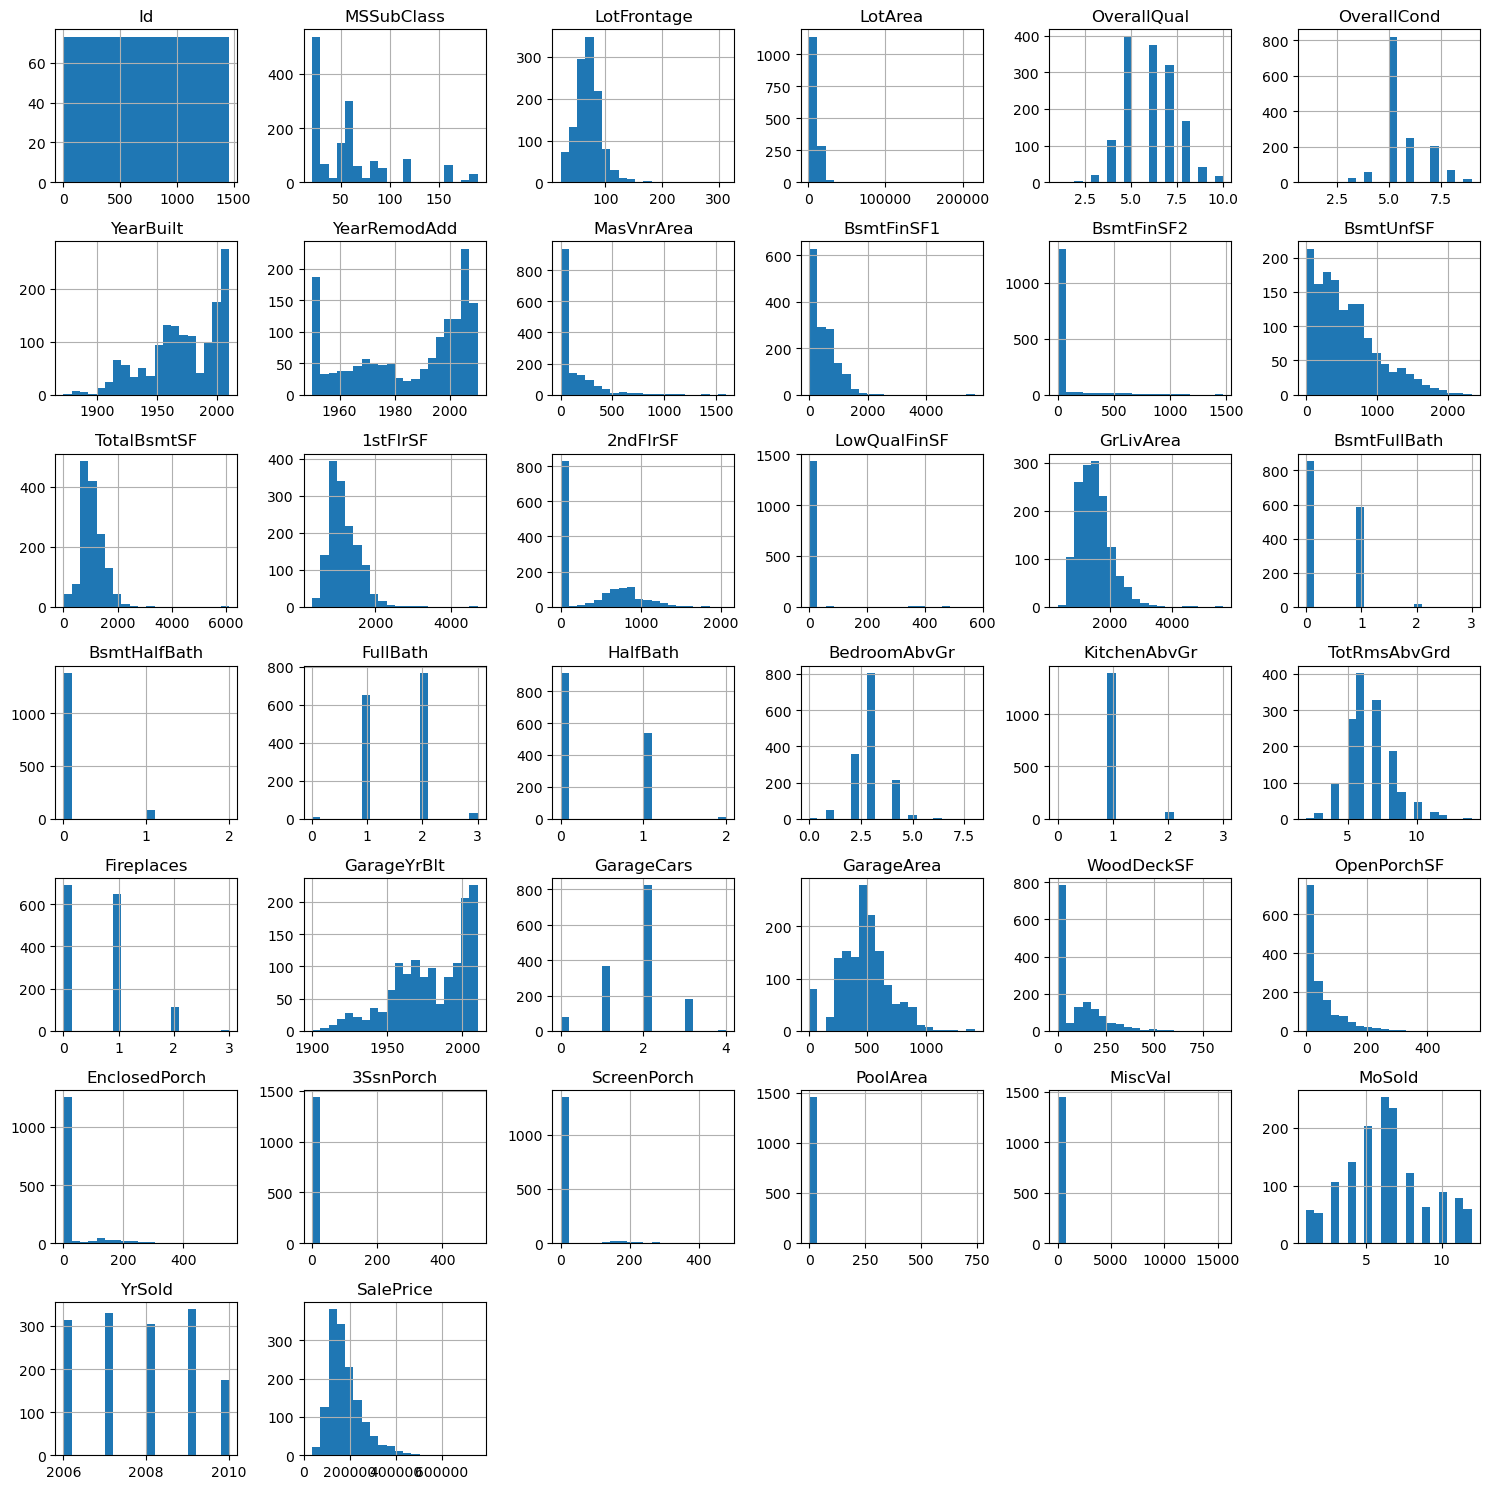

In [12]:
# Distribution of all numerical features
print(df.select_dtypes(include=['float64', 'int64']).skew())
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(15, 15), bins=20)
plt.tight_layout()
plt.show()


The skewness of each numerical feature helped determine how to handle null values to build an accurate model. For example, the features that were imputed using median imputation include 'LotFrontage' and 'GarageYrBlt'. The rest of the training data was not imputed to avoid introducing bias into the model, as these features rely heavily on being unbiased compared to the others.

# Target Variable Analysis

1.8828757597682129


Text(0, 0.5, 'Count')

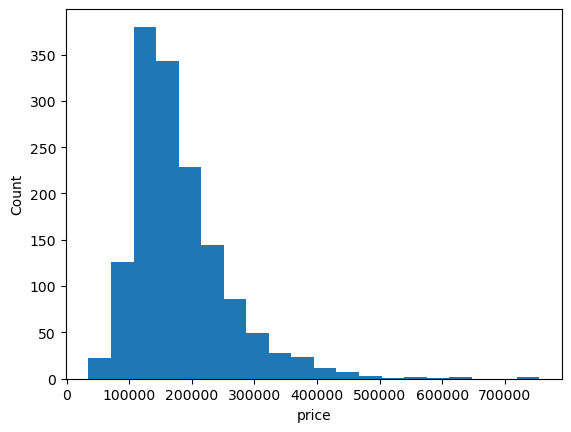

In [13]:
print(df['SalePrice'].skew())
plt.hist(df.SalePrice, bins= 20)
plt.xlabel('price')
plt.ylabel('Count')

In [14]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x16663b150>,
 'caps': [<matplotlib.lines.Line2D at 0x16664c5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x165327e90>],
 'medians': [<matplotlib.lines.Line2D at 0x16664d5d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16664ded0>],
 'means': []}

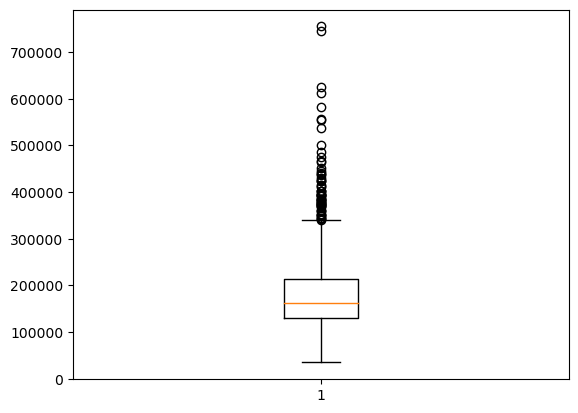

In [15]:
plt.boxplot(df.SalePrice)

(-0.5, 0.5) — low or approximately symmetric.

(-1, -0.5) U (0.5, 1) — moderately skewed.

Beyond -1 and 1 — Highly skewed.

Source: https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis 

Based on the boxplot for SalePrice, we can see that the median is around $160,000 to $170,000. The interquartile range (IQR) represents the middle 50% of the data, lying between the first quartile (Q1) and the third quartile (Q3). From the boxplot, the house price range spans approximately $130,000 to $210,000.

We can also observe that the outliers are prices below $30,000 and above $700,000. This can be confirmed by looking at the statistics for SalePrice: Q1 is $129,975 (i.e., 25th percentile), and Q2 (the median) is $163,000. Additionally, by examining the boxplot, the histogram, and the result of df['SalePrice'].skew(), we can confirm that the data is highly skewed to the right.

Knowing the values of Q1 and Q3, we can calculate the interquartile range:
IQR = Q3 - Q1 = 210,000 - 130,000 = 80,000


# Feature Correlation

In [16]:
import seaborn as sns

In [17]:
# Looking at just the numerical features to fully understand how these feature effect SalePrice
numerical_features = df.select_dtypes(include=['float64', 'int64'])
numerical_features

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [18]:
# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

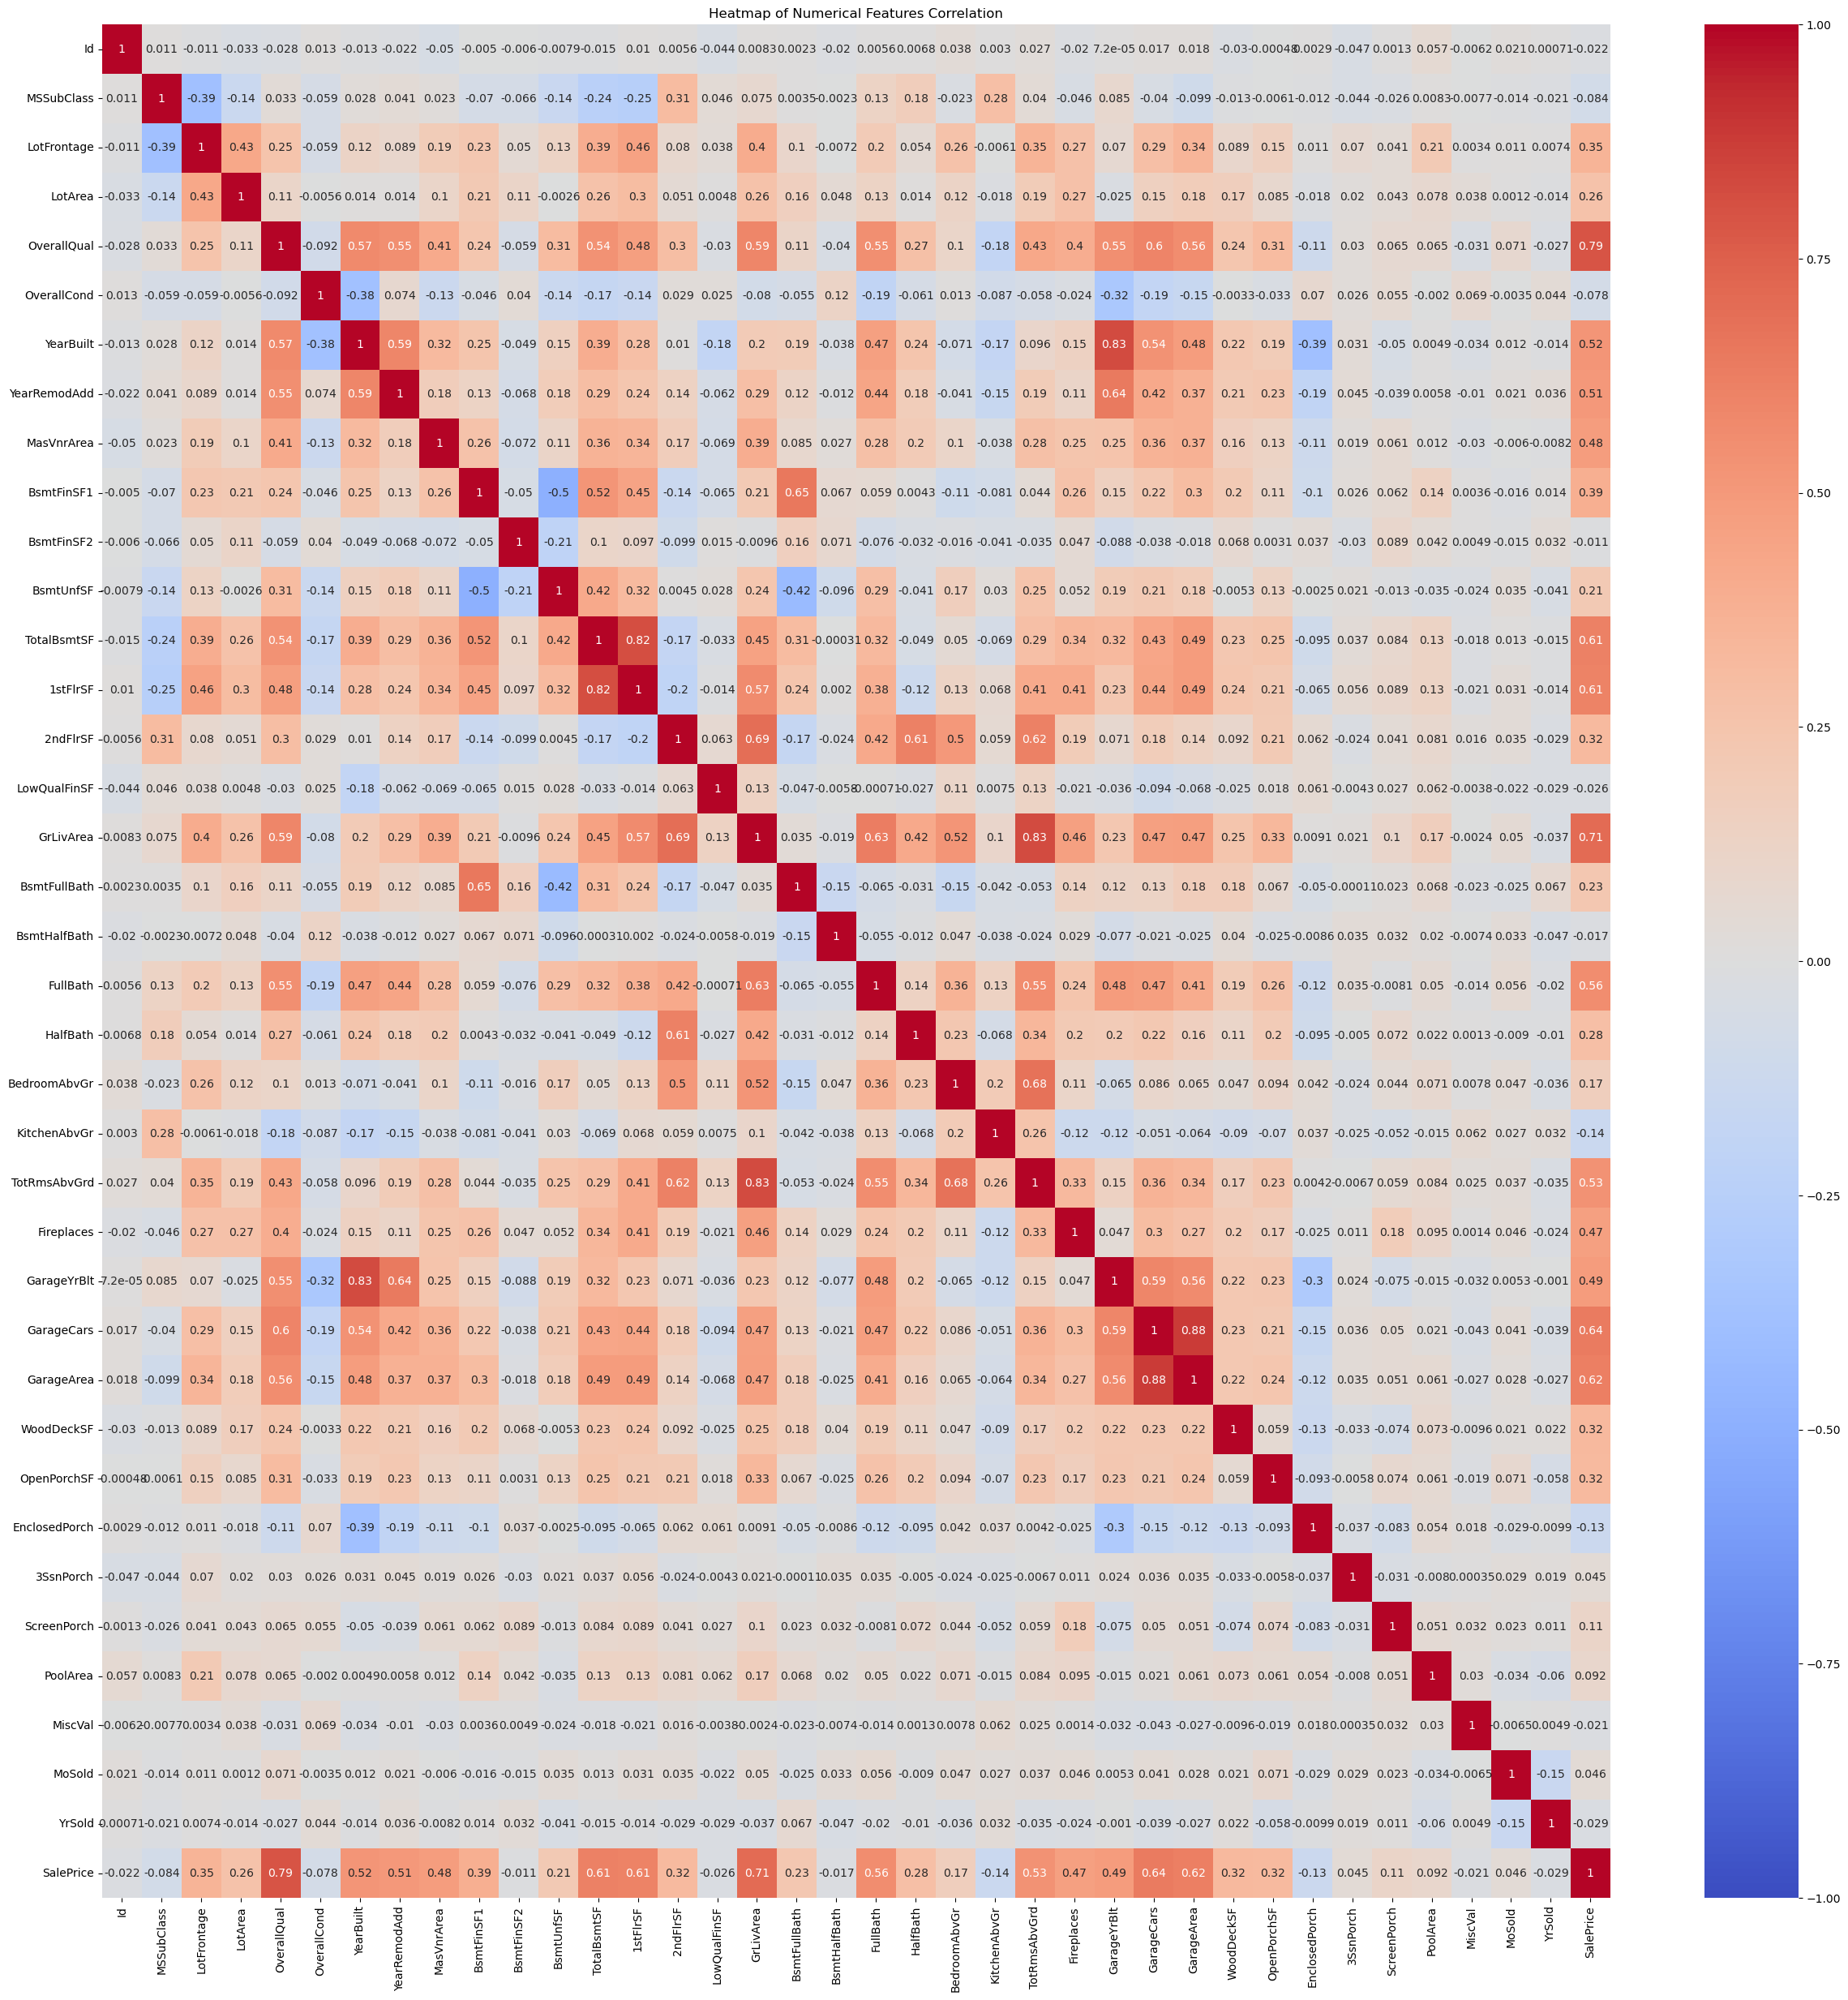

In [19]:
plt.figure(figsize=(30, 30))  # Adjust the figure size to make it more readable
sns.heatmap(correlation_matrix, annot=True, fmt='.2g', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Numerical Features Correlation')
plt.show()

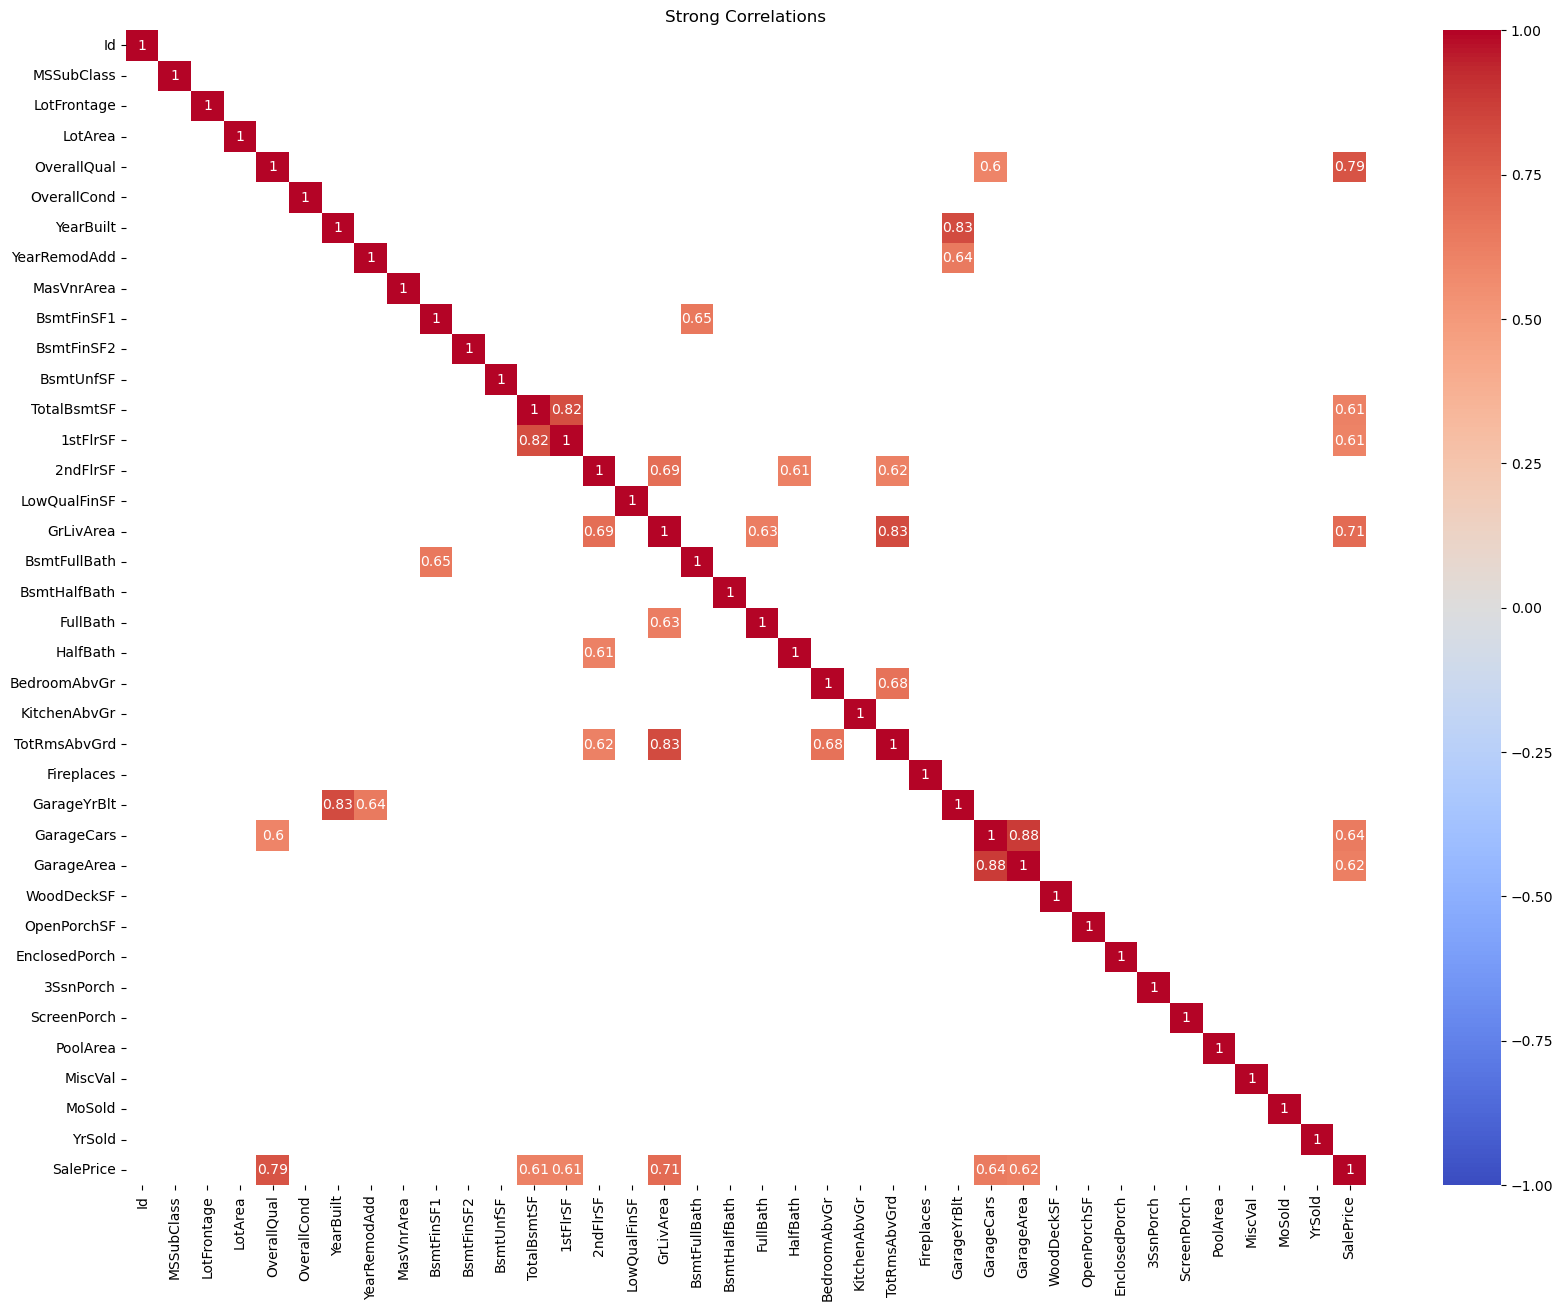

In [20]:
# Filter heatmap to show only correlations greater than 0.6
plt.figure(figsize=(20, 15))  # Adjust the figure size to make it more readable
strong_corr = correlation_matrix[(correlation_matrix > 0.6) | (correlation_matrix < -0.6)]
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Strong Correlations')
plt.show()

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


/var/folders/6j/3l6q9l4515sdmfyg8znhblxr0000gn/T/ipykernel_45244/2543594750.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_target = df.corr()['SalePrice'].sort_values(ascending=False)


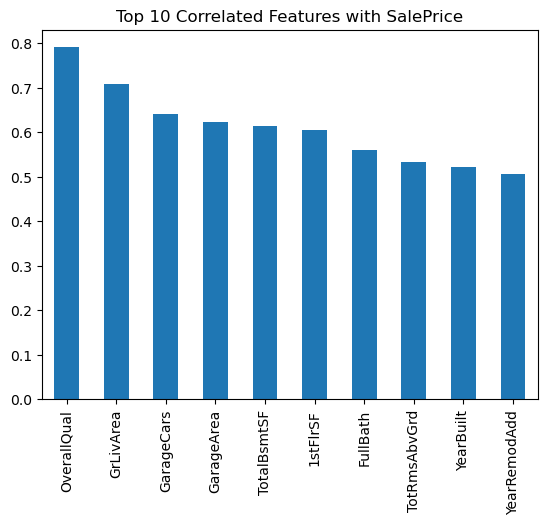

In [21]:
# Correlation of features with SalePrice
corr_with_target = df.corr()['SalePrice'].sort_values(ascending=False)
print(corr_with_target.head(10))

# Plot the top 10 correlations with SalePrice
corr_with_target.drop('SalePrice').head(10).plot(kind='bar')
plt.title('Top 10 Correlated Features with SalePrice')
plt.show()

Source: https://seaborn.pydata.org/generated/seaborn.heatmap.html 

Based on the heatmap and bar chart, we can observe the correlation between the features and SalePrice. We can rank the features from the most important to the least important before modeling as follows:
1. Highly Important:
    - OverallQual: 0.79 
    - GrLivArea: 0.71
2. Moderately Important:
    - Garagecars: 0.64
    - GarageArea: 0.62
    - TotalBsmtSF: 0.61
    - 1stFlrSF: 0.61
    - FullBath: 0.56
    - TotalRmsAbvGrd: 0.53
    - YearBlt: 0.52
    - YearRemodAdd: 0.51

# Key Observations

Based on the plots below (i.e., bar plots, box plots, and scatter plots) of the top 10 important features based on their correlation, we can analyze the relationships between the features and the target variable, SalePrice.

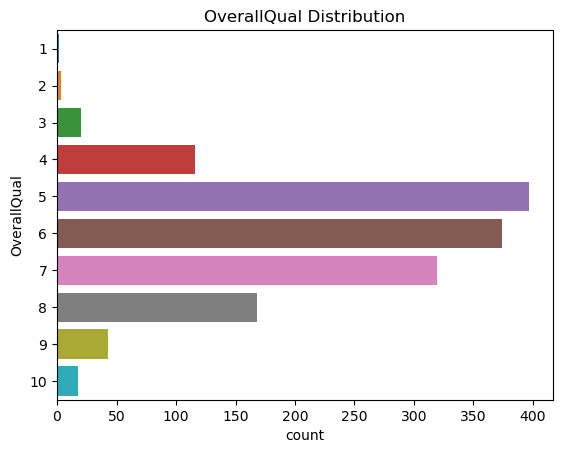

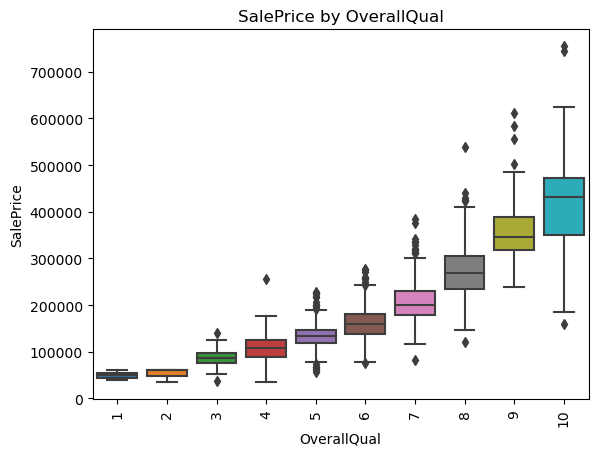

In [22]:
# Count plot for a OverQual variable 
sns.countplot(y='OverallQual', data=df)
plt.title('OverallQual Distribution')
plt.show()

# Boxplot of SalePrice by OverallQual
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('SalePrice by OverallQual')
plt.xticks(rotation=90)
plt.show()

This OverallQual horizontal bar plot shows the distribution of each rating score in the dataset. This feature represents the overall quality rating of each house, with a range of values where 1 represents very poor quality and 10 represents excellent quality. Based on the distribution, we can see that the most frequent values in the graph are between 5 and 6, meaning these are the most common ratings in the dataset.

The box plot shows how the OverallQual feature behaves in relation to the target variable, SalePrice. We observe a trend where higher overall quality corresponds to higher prices, indicating that OverallQual has a strong positive correlation with SalePrice. For ratings between 8 and 10, the outliers appear more spread out compared to the ratings between 1 and 3.

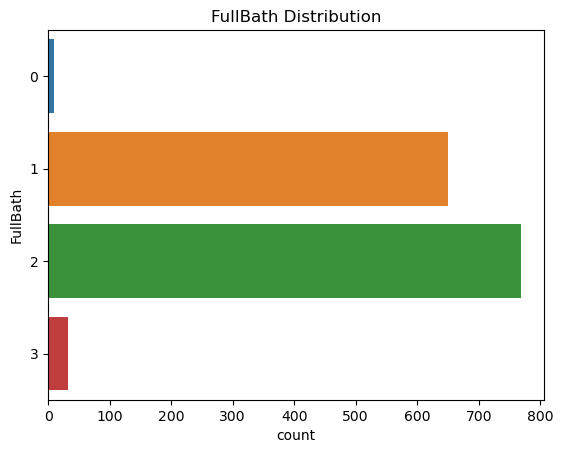

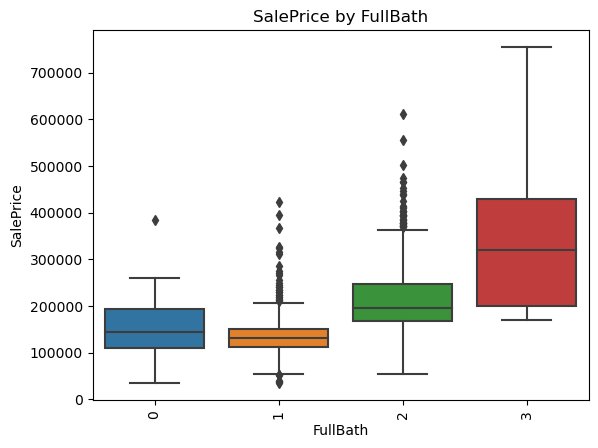

In [23]:
# Count plot for FullBath variable 
sns.countplot(y='FullBath', data=df)
plt.title('FullBath Distribution')
plt.show()

# Boxplot of SalePrice by FullBath
sns.boxplot(x='FullBath', y='SalePrice', data=df)
plt.title('SalePrice by FullBath')
plt.xticks(rotation=90)
plt.show()

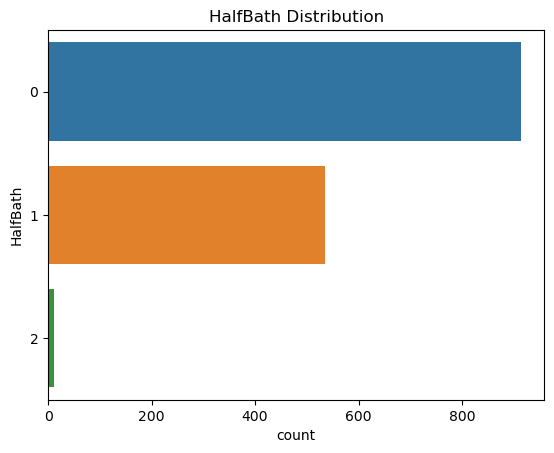

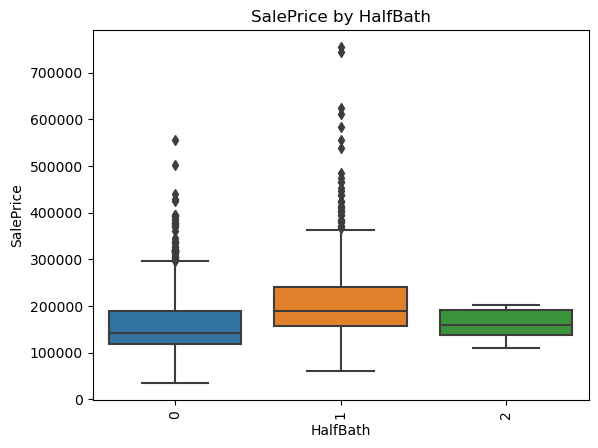

In [24]:
# Count plot for HalfBath variable 
sns.countplot(y='HalfBath', data=df)
plt.title('HalfBath Distribution')
plt.show()

# Boxplot of SalePrice by HalfBath
sns.boxplot(x='HalfBath', y='SalePrice', data=df)
plt.title('SalePrice by HalfBath')
plt.xticks(rotation=90)
plt.show()

The horizontal bar plots display the distribution of the FullBath and HalfBath features, showing how many full and half bathrooms are present across the dataset. The FullBath plot indicates that most houses have 1 or 2 full bathrooms, with 2 being the most common. In contrast, the HalfBath plot shows that the majority of houses have no half bathrooms (0).

The first box plot reveals a positive trend: houses with more full bathrooms tend to have higher prices. Meanwhile, the second box plot for half bathrooms shows a less clear trend. For full bathrooms, the values with the most outliers are 1 and 2, with the outliers for 2 being more spread out than those for 1. For half bathrooms, the most outliers occur at 0 and 1, with the outliers for 1 being more dispersed. Additionally, we observe that houses with 3 full bathrooms have outliers heavily skewed toward higher prices.

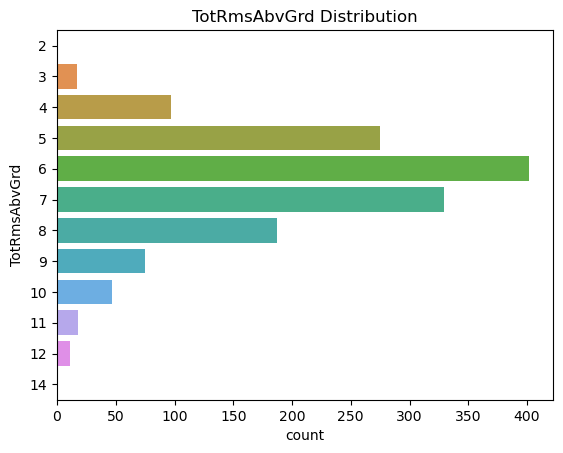

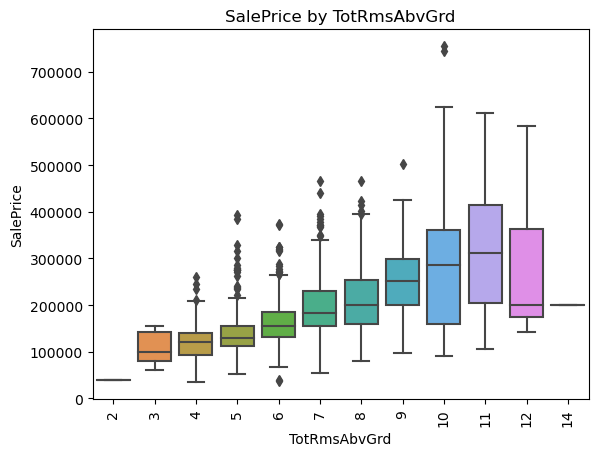

In [25]:
# Count plot for a TotRmsAbvGrd variable 
sns.countplot(y='TotRmsAbvGrd', data=df)
plt.title('TotRmsAbvGrd Distribution')
plt.show()

# Boxplot of SalePrice by TotRmsAbvGrd
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=df)
plt.title('SalePrice by TotRmsAbvGrd')
plt.xticks(rotation=90)
plt.show()

The count plot for Total Rooms Above Grade (excluding bathrooms, i.e., TotRmsAbvGrd) shows the distribution of the total number of rooms in the dataset. Most observations fall within the range of 6 to 7 rooms, while fewer houses have 9 to 12 or only 3 rooms.

The box plot reveals a clear trend: as the number of rooms increases, SalePrice also tends to rise. However, a notable aspect is the presence of many outliers, especially in the lower room ranges. This suggests that houses with fewer rooms may have other factors influencing their prices beyond just room count.

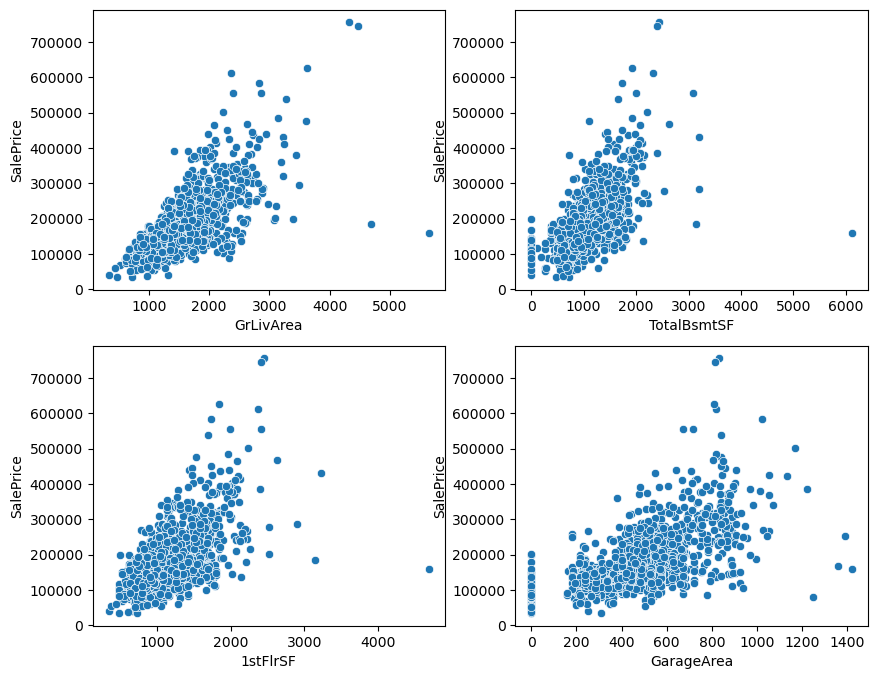

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot on the first subplot
sns.scatterplot(df, x="GrLivArea", y="SalePrice", ax=axes[0, 0])

# Plot on the second subplot
sns.scatterplot(df, x="TotalBsmtSF", y="SalePrice", ax=axes[0, 1])

# plot 3 subplot:
sns.scatterplot(df, x="1stFlrSF", y="SalePrice", ax=axes[1,0])

# plot 4:
sns.scatterplot(df, x="GarageArea", y="SalePrice", ax=axes[1,1])

plt.show()

The four scatter plots illustrate the correlation between specific features and SalePrice, showing how each feature influences the target variable. Based on these graphs, we observe a positive correlation across all features: as the values of each feature increase, SalePrice tends to increase as well. However, each plot offers unique insights.

- Plot 1: The first scatter plot, which shows Above Grade (Ground) Living Area (i.e., GrLivArea), contains a few outliers where the living area is large, but the SalePrice remains unexpectedly low.
- Plot 2: The second plot displays the Total Basement Area (i.e., TotalBsmtSF). It highlights that some houses do not have a basement, suggesting that the presence or absence of a basement can significantly influence SalePrice.
- Plot 3: The third scatter plot focuses on First Floor Area (i.e., 1stFlrSF) and shows outliers where, despite the floor area ranging from 3,000 to over 4,000 square feet, the SalePrice does not increase as expected. This suggests that other features might play a significant role in determining the price for these houses.
- Plot 4: The final plot, which examines Garage Area, reveals a pattern similar to the second plot. Not all houses have a garage, indicating that the presence of a garage can impact SalePrice.

In [27]:
categorical_columns = df.select_dtypes(include='object')  
categorical_columns.nunique() # looking at the unique outcomes for categorical variables

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

Based on these categorical columns and the number of unique outcomes for each, we can consider how to encode them down the line. For example, ['Neighborhood', 'Condition1', 'Condition2', 'Functional', 'MiscFeature'] are some of the categorical features that were target-encoded.